<a href="https://colab.research.google.com/github/Harsha0018/Conversational-Q-A-chatbot/blob/main/android%20malware%20detection%20using%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
#from sklearn.externals import joblib
import pickle
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("drive/My Drive/ISS/android.csv")



In [ ]:
df.head(300)

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(398, 331)

In [ ]:
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11]

android.permission.INTERNET                  195
android.permission.READ_PHONE_STATE          190
android.permission.ACCESS_NETWORK_STATE      167
android.permission.WRITE_EXTERNAL_STORAGE    136
android.permission.ACCESS_WIFI_STATE         135
android.permission.READ_SMS                  124
android.permission.WRITE_SMS                 104
android.permission.RECEIVE_BOOT_COMPLETED    102
android.permission.ACCESS_COARSE_LOCATION     80
android.permission.CHANGE_WIFI_STATE          75
dtype: int64

In [ ]:
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10]

android.permission.INTERNET                  104
android.permission.WRITE_EXTERNAL_STORAGE     76
android.permission.ACCESS_NETWORK_STATE       62
android.permission.WAKE_LOCK                  36
android.permission.RECEIVE_BOOT_COMPLETED     30
android.permission.ACCESS_WIFI_STATE          29
android.permission.READ_PHONE_STATE           24
android.permission.VIBRATE                    21
android.permission.ACCESS_FINE_LOCATION       18
android.permission.READ_EXTERNAL_STORAGE      15
dtype: int64

<Axes: >

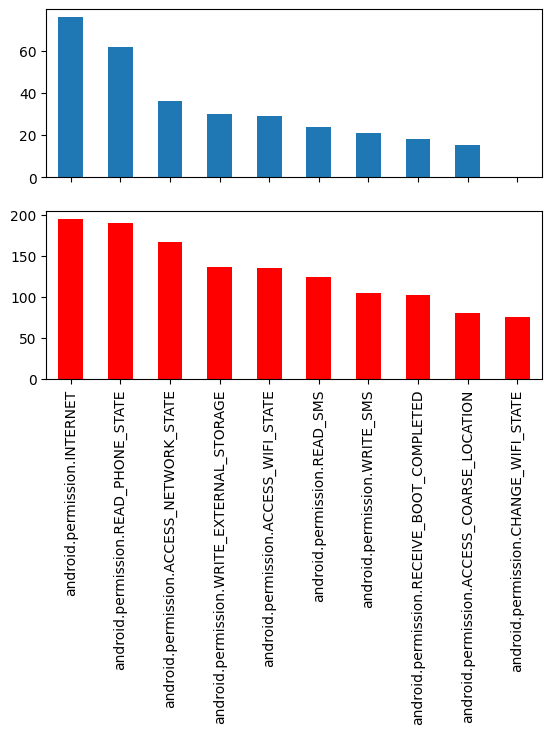

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, sharex=True)
#pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:1 0].plot.bar(ax=axs[0])
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[1: 10].plot.bar(ax=axs[0])
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1: 11].plot.bar(ax=axs[1], color="red")

In [ ]:
df1= df.copy()
df1.head()


,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:, 1:42], df1['type'], test_size=0.20, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((318, 41), (80, 41))

In [ ]:
y_train.shape, y_test.shape

((318,), (80,))

In [ ]:
# Naive Bayes algorithm

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# pred
pred = gnb.predict(X_test)

# accuracy
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None))

naive_bayes
0.625
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        64
           1       0.35      1.00      0.52        16

    accuracy                           0.62        80
   macro avg       0.67      0.77      0.61        80
weighted avg       0.87      0.62      0.66        80



In [ ]:
# kneighbors algorithm
for i in range(3,15,3):

  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  pred = neigh.predict(X_test)
  # accuracy
  accuracy = accuracy_score(pred, y_test)
  print("kneighbors {}".format(i))
  print(accuracy)
  print(classification_report(pred, y_test, labels=None))
  print("")

kneighbors 3
0.5
              precision    recall  f1-score   support

           0       0.24      0.36      0.29        22
           1       0.70      0.55      0.62        58

    accuracy                           0.50        80
   macro avg       0.47      0.46      0.45        80
weighted avg       0.57      0.50      0.52        80


kneighbors 6
0.75
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        40
           1       0.72      0.82      0.77        40

    accuracy                           0.75        80
   macro avg       0.76      0.75      0.75        80
weighted avg       0.76      0.75      0.75        80


kneighbors 9
0.75
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        40
           1       0.72      0.82      0.77        40

    accuracy                           0.75        80
   macro avg       0.76      0.75      0.75        80
weighted avg       

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

DecisionTreeClassifier()
0.7375
              precision    recall  f1-score   support

           0       0.85      0.64      0.73        45
           1       0.65      0.86      0.74        35

    accuracy                           0.74        80
   macro avg       0.75      0.75      0.74        80
weighted avg       0.77      0.74      0.74        80



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv("drive/My Drive/ISS/android_trafficc.csv")
data.head()

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [ ]:
data.columns
data.shape


(7845, 17)

In [ ]:
data.isna().sum()

name                       0
tcp_packets                0
dist_port_tcp              0
external_ips               0
vulume_bytes               0
udp_packets                0
tcp_urg_packet             0
source_app_packets         0
remote_app_packets         0
source_app_bytes           0
remote_app_bytes           0
duracion                7845
avg_local_pkt_rate      7845
avg_remote_pkt_rate     7845
source_app_packets.1       0
dns_query_times            0
type                       0
dtype: int64

In [ ]:
data = data.drop(['duracion','avg_local_pkt_rate','avg_remote_pkt_rate'], axis=1).copy()
data.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times
count,7845.000000,7845.000000,7845.000000,7.845000e+03,7845.000000,7845.000000,7845.000000,7845.000000,7.845000e+03,7.845000e+03,7845.000000,7845.000000
mean,147.578713,7.738177,2.748502,1.654375e+04,0.056724,0.000255,152.911918,194.706310,2.024967e+05,1.692260e+04,152.911918,4.898917
std,777.920084,51.654222,2.923005,8.225650e+04,1.394046,0.015966,779.034618,1068.112696,1.401076e+06,8.238182e+04,779.034618,18.900478
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,6.900000e+01,1.000000,0.000000
25%,6.000000,0.000000,1.000000,8.880000e+02,0.000000,0.000000,7.000000,7.000000,9.340000e+02,1.046000e+03,7.000000,1.000000
50%,25.000000,0.000000,2.000000,3.509000e+03,0.000000,0.000000,30.000000,24.000000,4.090000e+03,3.803000e+03,30.000000,3.000000
75%,93.000000,0.000000,4.000000,1.218900e+04,0.000000,0.000000,98.000000,92.000000,2.624400e+04,1.261000e+04,98.000000,5.000000
max,37143.000000,2167.000000,43.000000,4.226790e+06,65.000000,1.000000,37150.000000,45928.000000,6.823516e+07,4.227323e+06,37150.000000,913.000000


In [ ]:
data.loc[data.tcp_urg_packet > 0].shape[0]
data = data.drop(columns=["tcp_urg_packet"], axis=1).copy()
data.shape
data=data[data.tcp_packets<20000].copy()
data=data[data.dist_port_tcp<1400].copy()
data=data[data.external_ips<35].copy()
data=data[data.vulume_bytes<2000000].copy()
data=data[data.udp_packets<40].copy()
data=data[data.remote_app_packets<15000].copy()
data[data.duplicated()].sum()

name                    AntiVirusAntiVirusAntiVirusAntiVirusAntiVirusA...
tcp_packets                                                         15038
dist_port_tcp                                                        3514
external_ips                                                         1434
vulume_bytes                                                      2061210
udp_packets                                                            38
source_app_packets                                                  21720
remote_app_packets                                                  18841
source_app_bytes                                                  8615120
remote_app_bytes                                                  2456160
source_app_packets.1                                                21720
dns_query_times                                                      5095
type                    benignbenignbenignbenignbenignbenignbenignbeni...
dtype: object

In [ ]:
data=data.drop('source_app_packets.1',axis=1).copy()
scaler = preprocessing.RobustScaler()
scaledData = scaler.fit_transform(data.iloc[:,1:11])
scaledData = pd.DataFrame(scaledData, columns=['tcp_packets','dist_po rt_tcp','external_ips','vulume_bytes','udp_packets','source_app_packe ts','remote_app_packets',' source_app_bytes','remote_app_bytes','dns_ query_times'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaledData.iloc[:,0:
10], data.type.astype("str"), test_size=0.25, random_state=45)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
## accuracy
accuracy3 = accuracy_score(y_test,pred)
print("naive_bayes")
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))

naive_bayes
0.7375
              precision    recall  f1-score   support

      benign       0.81      0.12      0.20      1190
   malicious       0.41      0.96      0.58       768

    accuracy                           0.45      1958
   macro avg       0.61      0.54      0.39      1958
weighted avg       0.66      0.45      0.35      1958

cohen kappa score
0.06082933470572538


In [ ]:
# kneighbors algorithm
for i in range(3,15,3):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  pred = neigh.predict(X_test)
  # accuracy
  accuracy2 = accuracy_score(pred, y_test)
  print("kneighbors {}".format(i))
  print(accuracy)
  print(classification_report(pred, y_test, labels=None))
  print("cohen kappa score")
  print(cohen_kappa_score(y_test, pred))
  print("")

kneighbors 3
0.7375
              precision    recall  f1-score   support

      benign       0.89      0.92      0.91      1155
   malicious       0.88      0.84      0.86       803

    accuracy                           0.89      1958
   macro avg       0.89      0.88      0.88      1958
weighted avg       0.89      0.89      0.89      1958

cohen kappa score
0.7694107814458838

kneighbors 6
0.7375
              precision    recall  f1-score   support

      benign       0.92      0.89      0.90      1222
   malicious       0.83      0.87      0.85       736

    accuracy                           0.88      1958
   macro avg       0.87      0.88      0.88      1958
weighted avg       0.88      0.88      0.88      1958

cohen kappa score
0.7517879819393982

kneighbors 9
0.7375
              precision    recall  f1-score   support

      benign       0.89      0.90      0.90      1166
   malicious       0.86      0.83      0.84       792

    accuracy                           0.87   

In [ ]:
df.isnull()

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy4 = accuracy_score(y_test,pred)
print(rdF)
print(accuracy4)
if(accuracy4>0.9):
  print("Pass .. Install the APK ")
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
print(cm)

RandomForestClassifier(max_depth=50, n_estimators=250, random_state=45)
0.9172625127681308
Pass .. Install the APK 
              precision    recall  f1-score   support

      benign       0.93      0.94      0.93      1190
   malicious       0.90      0.88      0.89       768

    accuracy                           0.92      1958
   macro avg       0.91      0.91      0.91      1958
weighted avg       0.92      0.92      0.92      1958

cohen kappa score
0.8258206083396299
[[1117   73]
 [  89  679]]


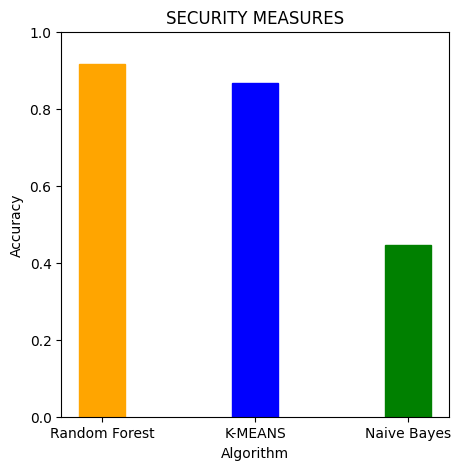

In [ ]:
data ={'Random Forest': accuracy4, 'K-MEANS' : accuracy2, 'Naive Bayes': accuracy3}
algorithms = data.keys()
results = data.values()
fig = plt.figure(figsize=(5,5))
barlist = plt.bar(algorithms, results, width = 0.3)
barlist[0].set_color('orange')
barlist[1].set_color('blue')
barlist[2].set_color('green')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("SECURITY MEASURES")
plt.show()